In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


## I. Introduction

* Introduction of volatility
* Why use HAR-RV model?

## II. DATA 
* Source of Data, how many data we use
* Explain the graph

In [2]:
data=pd.read_excel("S&P500Index_v2.xlsx")
data

,Name,Date,Day,Open,High,Low,Close
0,SPX.GI,2019-12-09 09:35:00,2019-12-09,3141.86,3143.41,3140.91,3143.41
1,SPX.GI,2019-12-09 09:40:00,2019-12-09,3143.54,3146.64,3142.95,3146.39
2,SPX.GI,2019-12-09 09:45:00,2019-12-09,3146.34,3148.04,3146.32,3147.96
3,SPX.GI,2019-12-09 09:50:00,2019-12-09,3147.92,3148.38,3147.23,3147.34
4,SPX.GI,2019-12-09 09:55:00,2019-12-09,3147.36,3148.15,3146.96,3147.80
...,...,...,...,...,...,...,...
57138,SPX.GI,2022-11-11 15:40:00,2022-11-11,3988.72,3995.15,3988.08,3994.93
57139,SPX.GI,2022-11-11 15:45:00,2022-11-11,3994.89,3997.88,3994.41,3997.82
57140,SPX.GI,2022-11-11 15:50:00,2022-11-11,3997.87,4001.28,3996.24,3999.07
57141,SPX.GI,2022-11-11 15:55:00,2022-11-11,3999.06,4000.29,3993.02,3994.29


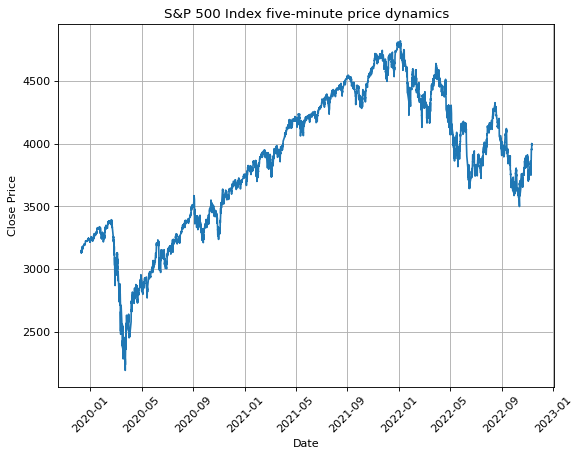

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data['Date'], data["Close"])

plt.grid()
plt.title('S&P 500 Index five-minute price dynamics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [4]:
data["log_return"] = np.nan
for i in range(1,len(data["Day"])):
    data.loc[i,"log_return_sqr"] = ((np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100)**2
    
    
for i in range(1,len(data["Day"])):
    data.loc[i,"log_return"] = (np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100

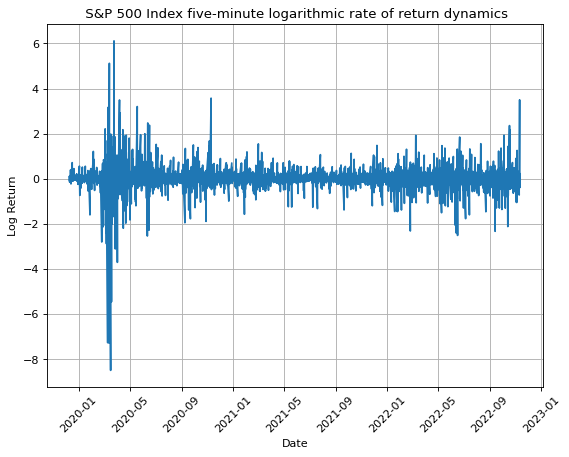

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data['Date'], data["log_return"])

plt.grid()
plt.title(' S&P 500 Index five-minute logarithmic rate of return dynamics')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

## III. ECONOMETRIC MODEL

* Details about model, more introduction.
* Show the formulas

### A. HAR-RV mode

In [6]:
# DAY

datas=data[["Day","log_return_sqr"]]
dayd=datas.groupby(by=["Day"]).sum()

In [7]:
# Week (1-5)

dayd2=dayd.reset_index()
dayd2["week_log_return_sqr"]=0.0
dayd2.tail(10)

#monthd=datams.groupby(["Year","Month"]).mean()
for i in range(0,len(dayd2["log_return_sqr"])-4):
    dayd2["week_log_return_sqr"][i]=(dayd2.loc[i:i+4,"log_return_sqr"].sum())/5
    


/Users/huangjuhua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
# Month

dayd2["month_log_return_sqr"]=0.0
for i in range(0,len(dayd2["log_return_sqr"])-20):
    dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21

/Users/huangjuhua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
# Final: droping the last 20 rows
m1=dayd2["month_log_return_sqr"]!=0
RV=dayd2[m1]
RV

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
0,2019-12-09,0.045404,0.262899,0.231236
1,2019-12-10,0.176594,0.370473,0.246274
2,2019-12-11,0.088090,0.350744,0.244390
3,2019-12-12,0.630203,0.350151,0.244219
4,2019-12-13,0.374203,0.237072,0.223138
...,...,...,...,...
711,2022-10-10,1.491055,3.791561,2.715211
712,2022-10-11,2.392181,4.796303,2.707353
713,2022-10-12,0.746298,5.637882,2.658695
714,2022-10-13,10.838424,5.756028,3.249539


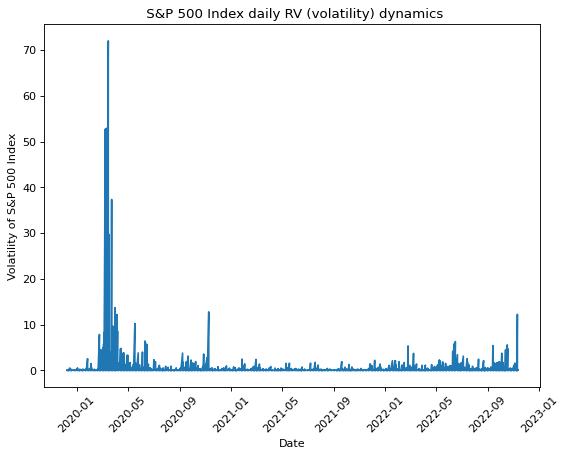

In [10]:
# plt.figure(figsize=[10,8])
# plt.plot(RV['Day'],RV['log_return_sqr'])

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data['Day'], data["log_return_sqr"])

# plt.grid()
plt.title(' S&P 500 Index daily RV (volatility) dynamics')
plt.xlabel('Date')
plt.ylabel('Volatility of S&P 500 Index')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [11]:
columns=["Day","log_return_sqr","week_log_return_sqr","month_log_return_sqr"]
RVPlus1=RV[columns]

RVPlus1=RVPlus1.iloc[1:]

RVPlus1.rename(columns = {'Day':'Day', 
                          'log_return_sqr':'log_return_sqr_plus_one',
                          'week_log_return_sqr':'week_log_return_sqr_plus_one',
                          'month_log_return_sqr':'month_log_return_sqr_plus_one'}, inplace = True)

RVPlus1= RVPlus1.iloc[: , 1:]
RV=RV.join(RVPlus1)

RV['week_log_return_sqr_plus_one'] = RV['week_log_return_sqr_plus_one'].shift(-1)
RV['log_return_sqr_plus_one'] = RV['log_return_sqr_plus_one'].shift(-1)
RV['month_log_return_sqr_plus_one'] = RV['month_log_return_sqr_plus_one'].shift(-1)
RV = RV[:-1]
RV.head(10)

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr,log_return_sqr_plus_one,week_log_return_sqr_plus_one,month_log_return_sqr_plus_one
0,2019-12-09,0.045404,0.262899,0.231236,0.176594,0.370473,0.246274
1,2019-12-10,0.176594,0.370473,0.246274,0.088090,0.350744,0.244390
2,2019-12-11,0.088090,0.350744,0.244390,0.630203,0.350151,0.244219
3,2019-12-12,0.630203,0.350151,0.244219,0.374203,0.237072,0.223138
4,2019-12-13,0.374203,0.237072,0.223138,0.583274,0.210662,0.213302
5,2019-12-16,0.583274,0.210662,0.213302,0.077952,0.101666,0.202749
6,2019-12-17,0.077952,0.101666,0.202749,0.085122,0.089531,0.204643
7,2019-12-18,0.085122,0.089531,0.204643,0.064809,0.087548,0.209901
8,2019-12-19,0.064809,0.087548,0.209901,0.242155,0.100733,0.217742
9,2019-12-20,0.242155,0.100733,0.217742,0.038295,0.095584,0.227161


In [12]:
RV.shape

(715, 7)

## IV. REGRESSION ANALYSIS

### A. Statistic description

### B. Result sanalysis
* Explanation of the regression table.

In [38]:
def mul_regress(X,y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    return results

In [83]:
X = RV[['log_return_sqr','week_log_return_sqr','month_log_return_sqr']] 
X = sm.add_constant(X)
y_day = RV['log_return_sqr_plus_one'] 
RVd_regress = mul_regress(X,y_day)

y_week = RV['week_log_return_sqr_plus_one'] 
RVw_regress = mul_regress(X,y_week)

y_month = RV['month_log_return_sqr_plus_one'] 
RVm_regress = mul_regress(X,y_month)


In [87]:

Rvw_regress.pvalues

Rvw_regress.rsquared

Rvw_regress.rsquared_adj

Rvw_regress.tvalues

Rvw_regress.params

# Rvw_regress.nobs

const                  -0.037180
log_return_sqr         -0.226426
week_log_return_sqr     1.129850
month_log_return_sqr    0.112665
dtype: float64

https://s2.smu.edu/tfomby/eco5375/data/Notes/Forecasting%20Experiments.pdf

## Out of sample Prediction
https://s2.smu.edu/tfomby/eco5375/data/Notes/Forecasting%20Experiments.pdf

In this section, we use out-of-sample prediction to determine if a proposed leading indicator is potentially useful for forecasting a target variable. 

The steps for conducting an out-of-sample forecasting experiment are as follows:

1. Divide the data into two parts: the in-sample data set (roughly 50% of the data) and the out-of-sample data set (the remaining 50% of the entire data set).
    * Set the first 50% of the data as in-sample data set.
    - Set the last 50% of the data as out-of-sample data set.

2. We choose h = 1 as appropriate forecast horizon and loss function for the forecasting experiment. 
    - The forecast horizon is the number of steps ahead that one is most interested in forecasting the target variable. 
    - For example, if we interested in obtaining accurate forecasts of volatility one day ahead and the appropriate forecast horizon would be h = 1. 
    
3. Use in-sample data set to train an OLS model, then predict one day ahead volatility by using out-of-sample data set in OLS model.

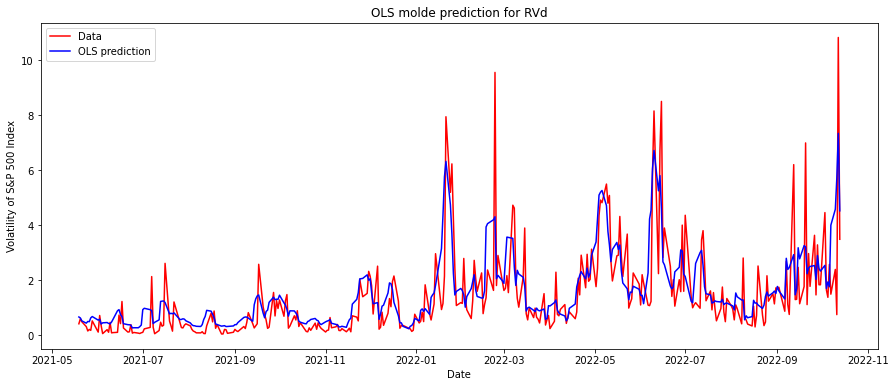

In [105]:

RV_0_360 = RV.iloc[:361,:] # in-sample data set
RV_361_715 = RV.iloc[361:,:] # out-of-sample data set


# Train OLS model with in-sample data set
X = RV_0_360[['log_return_sqr','week_log_return_sqr','month_log_return_sqr']] # Independent variable 
X = sm.add_constant(X)
y_day = RV_0_360['log_return_sqr_plus_one']  # Dependent variable 
Rvd_half_regress = mul_regress(X,y_day) 

Xnew = RV_361_715[['log_return_sqr','week_log_return_sqr','month_log_return_sqr']] 
Xnew = sm.add_constant(Xnew)

# Predict RVd by out-of-sample data set
ynewpred_d = Rvd_half_regress.predict(Xnew) 
RV_361_715['prediect_RVd'] = ynewpred_d

# Plot the graph
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(RV_361_715['Day'], RV_361_715['log_return_sqr_plus_one'], "r-", label="Data")
ax.plot(RV_361_715['Day'], RV_361_715['prediect_RVd'], "b-", label="OLS prediction")
plt.title('OLS molde prediction for RVd')
plt.xlabel('Date')
plt.ylabel('Volatility of S&P 500 Index')
ax.legend(loc="best")
plt.show()

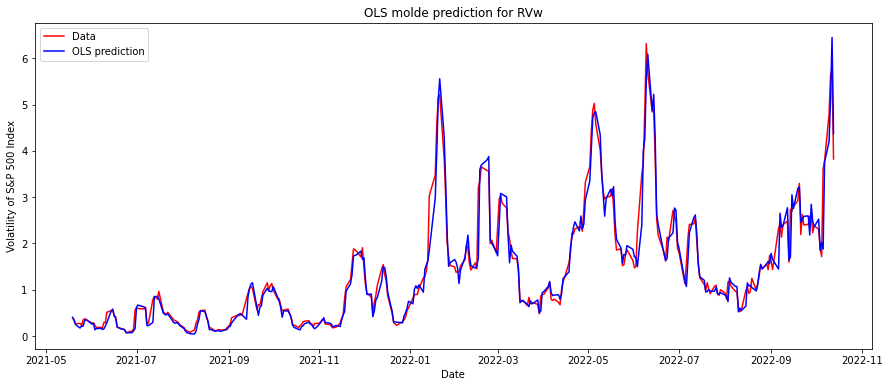

In [106]:
# Train OLS model with in-sample data set
y_week = RV_0_360['week_log_return_sqr_plus_one'] # Dependent variable

Rvw_half_regress = mul_regress(X,y_week)

# Predict RVw by out-of-sample data set
ynewpred_w = Rvw_half_regress.predict(Xnew) 
RV_361_715['prediect_RVw'] = ynewpred_w

# Plot the graph
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(RV_361_715['Day'], RV_361_715['week_log_return_sqr_plus_one'], "r-", label="Data")
ax.plot(RV_361_715['Day'], RV_361_715['prediect_RVw'], "b-", label="OLS prediction")
plt.title('OLS molde prediction for RVw')
plt.xlabel('Date')
plt.ylabel('Volatility of S&P 500 Index')
ax.legend(loc="best")
plt.show()

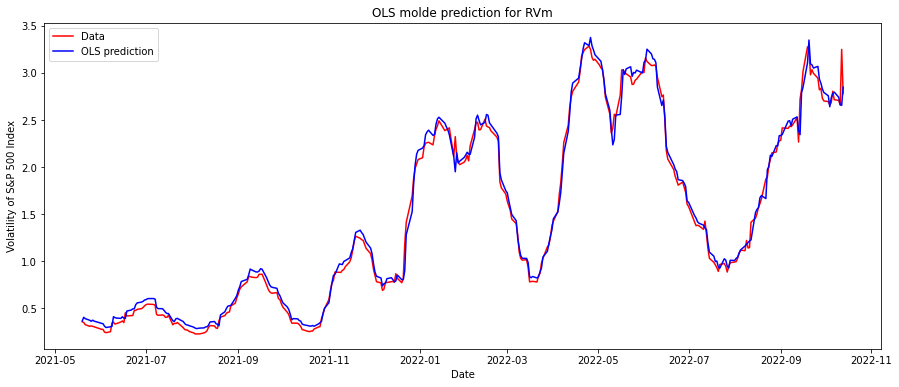

In [107]:
# Train OLS model with in-sample data set
y_month = RV_0_360['month_log_return_sqr_plus_one'] # Dependent variable
Rvd_half_regress = mul_regress(X,y_month)

# Predict RVm by out-of-sample data set
ynewpred_m = Rvd_half_regress.predict(Xnew) 
RV_361_715['prediect_RVm'] = ynewpred_m

# Plot the graph
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(RV_361_715['Day'], RV_361_715['month_log_return_sqr_plus_one'], "r-", label="Data")
ax.plot(RV_361_715['Day'], RV_361_715['prediect_RVm'], "b-", label="OLS prediction")
plt.title('OLS molde prediction for RVm')
plt.xlabel('Date')
plt.ylabel('Volatility of S&P 500 Index')
ax.legend(loc="best")

## V . CONCLUSION

## REFERENCES

In [ ]:
x1 = np.linspace(0, 500,500)


